# Specific Heat

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [4]:
M=2
m=10
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt".format(classname,M)

In [5]:
files=glob.glob(data_root + signature)

In [6]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_10_M_2_entropy-order_*fast.txt'

In [7]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

### checking ensemble size

In [8]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 800000   En= 20000
N= 1200000   En= 20000
N= 1000000   En= 20000
N= 400000   En= 20000
N= 600000   En= 20000


In [21]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -(1-t[1:])*np.diff(H)*N
    print(1/np.diff(t)[0])
    print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [23]:
tc=0.72775

## Load data from file

In [24]:
min_limit=0.7
max_limit=0.8

In [12]:
data=dict()
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    index=(t > min_limit) & (t < max_limit)
    data[N] = X[index]
    

(79999, 3)
999999.9999712444
800000
(119999, 3)
999999.9999712444
1200000
(99999, 3)
999999.9999712444
1000000
(39999, 3)
333333.3333360839
400000
(59999, 3)
999999.9999712444
600000


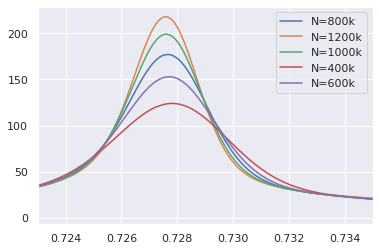

In [26]:
for N in data.keys():
    print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlim([0.723, 0.735])
filename=fig_root + classname + "specific_heat_m{}_M{}".format(m, M)
# plt.savefig(filename)

(79999, 3)
999999.9999712444
800000
(119999, 3)
999999.9999712444
1200000
(99999, 3)
999999.9999712444
1000000
(39999, 3)
333333.3333360839
400000
(59999, 3)
999999.9999712444
600000


(0.723, 0.735)

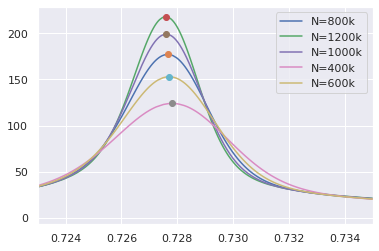

In [27]:
critical = []
for N in data.keys():
    print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    i = np.argmax(X)
    critical.append([N, t[i], X[i]])
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    plt.plot(t[i], X[i], 'o')
    pass
plt.legend()
plt.xlim([0.723, 0.735])

In [46]:
def find_exponent(X):
    X=np.array(X)
    print(X.shape)
    plt.plot(np.log(X[:,0]), np.log(X[:,2]), 'o')
    regress = stats.linregress(np.log(X[:,0]), np.log(X[:,2]))
    print(regress)
    y = regress[0] * np.log(X[:,0]) + regress[1]
    plt.plot(np.log(X[:,0]), y)
    return regress

(5, 3)
LinregressResult(slope=0.514096250213949, intercept=-1.8108000651389524, rvalue=0.999987102675164, pvalue=5.5600983616900085e-08, stderr=0.0015074844004197522)
alpha/nu =  0.514096250213949


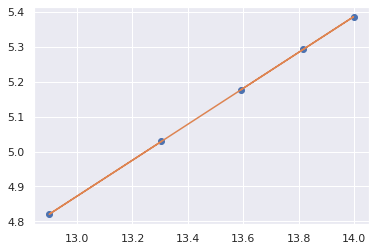

In [47]:
regress = find_exponent(critical)
print("alpha/nu = ", regress[0])


### It is evident that increasing system size gets you closer to the critical point

It flows the relation

$(t(N)-t_c(\infty)) N ^{1/\nu} = const $

$(t(N)-t_c) \sim N ^{-1/\nu}$

$(t(N)-t_c(\infty)) \sim (N^{-1})^{1/\nu}$

In the limit $N\rightarrow \infty$, $t(N) = t(\infty)$

If $1/\nu$ is known then finding $t_c$ is very easy.

In [30]:
def find_tc(X, one_by_nu):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    X=np.array(X)
    
    axs[0].plot(X[:,0], X[:,1], 'o')
    x = X[:,0]**(-one_by_nu)
    y = X[:,1]
    print(X.shape)
    axs[1].plot(x, y, 'o')
    regress = stats.linregress(x, y)
    print(regress)
    y = regress[0] * x + regress[1]
    axs[1].plot(x, y)

(5, 3)
LinregressResult(slope=0.3370708275787049, intercept=0.7272758516059589, rvalue=0.997346022635822, pvalue=0.00016406151304447795, stderr=0.014206593097531415)


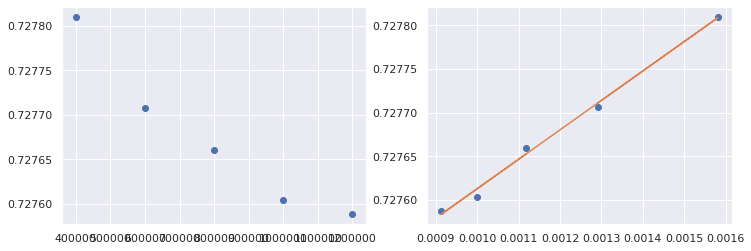

In [31]:
find_tc(critical, 0.5)

### finding $1/\nu$

In [35]:
h=50

999999.9999712444
800000
[19498 24500]
999999.9999712444
1200000
[29361 36417]
999999.9999712444
1000000
[24418 30455]
333333.3333360839
400000
[ 9681 12459]
999999.9999712444
600000
[14575 18496]


(0.7, 0.74)

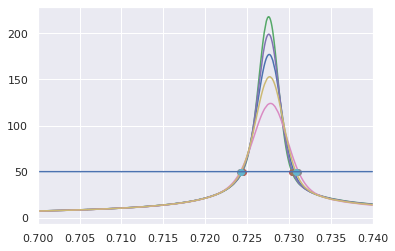

In [36]:
intersection_x = [] # x value at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
for N in data.keys():
    t, H, P = data[N].T
    y = find_specific_heat(t, H, N)
    y_h = np.ones(t.shape[0]-1)*h
#     t_prime = (t-tc)*N**(one_by_nu)
    idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
    
    print(idx)
    plt.plot(t[1:], y, label='N={}'.format(N))
#     plt.plot(t, y_h)
    plt.plot(t[1:][idx], y_h[idx], 'o')
    #  N, t_left, X_left, t_right, X_right
    
    intersection_x.append([N, t[idx][0], y[idx][0], t[idx][-1], y[idx][-1]])
    pass
plt.plot(t[1:], y_h)
plt.xlim([0.7, 0.74])
# plt.ylim([0, 0.5])

In [37]:
intersection_x = np.array(intersection_x)

In [38]:
print("N, t_left, X_left, t_right, X_right")
print(intersection_x)

N, t_left, X_left, t_right, X_right
[[8.00000000e+05 7.24374000e-01 4.99968315e+01 7.30626000e-01
  5.00184716e+01]
 [1.20000000e+06 7.24468000e-01 4.99863932e+01 7.30348000e-01
  5.00198291e+01]
 [1.00000000e+06 7.24419000e-01 4.99874562e+01 7.30456000e-01
  5.00004960e+01]
 [4.00000000e+05 7.24205000e-01 4.99811223e+01 7.31150000e-01
  5.00478834e+01]
 [6.00000000e+05 7.24293000e-01 4.99883493e+01 7.30828000e-01
  5.00139394e+01]]


In [39]:
intersection_x[:,1] = np.abs(intersection_x[:,1]-tc)
intersection_x[:,3] = np.abs(intersection_x[:,3]-tc)

LinregressResult(slope=-0.24613321667121266, intercept=-2.5086270320163755, rvalue=-0.9997894701513025, pvalue=3.6668290189758897e-06, stderr=0.0029164196752363017)


Text(0, 0.5, '$\\log(t-t_c)$')

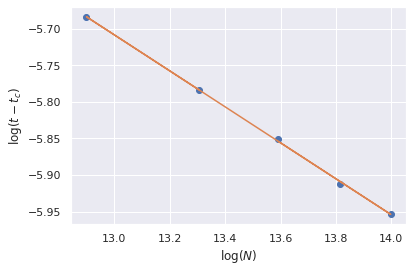

In [40]:
log_data = np.log(intersection_x)
plt.plot(log_data[:,0], log_data[:,3], 'o')
regress = stats.linregress(log_data[:,0], log_data[:,3])
print(regress)
y = regress[0]*log_data[:,0] + regress[1]
plt.plot(log_data[:,0], y)
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(t-t_c)$")

In [85]:
print(1/1.946)
print(0.884/1.946)

0.513874614594039
0.45426515930113054


#### Data Collapse

(79999, 3)
999999.9999712444
800000
(119999, 3)
999999.9999712444
1200000
(99999, 3)
999999.9999712444
1000000
(39999, 3)
333333.3333360839
400000
(59999, 3)
999999.9999712444
600000


(-10, 10)

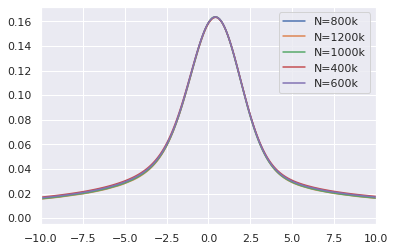

In [51]:
one_by_nu = 0.513874614594039
alpha_by_nu=0.514096250213949

tc=0.72727

for N in data.keys():
    print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    x=(t-tc)*N**(one_by_nu)
    y=X*N**(-alpha_by_nu)
    plt.plot(x[1:], y, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlim([-10, 10])

In [43]:
tc

0.72725